## 多项式特征解决非线性问题

In [1]:
import numpy as np
import matplotlib.pyplot as plt

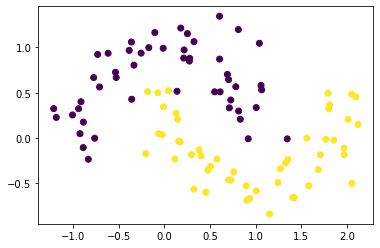

In [2]:
from sklearn.datasets import make_moons
x, y = make_moons(n_samples=100, noise=0.2, random_state=0)

plt.scatter(x[:,0], x[:,1], c = y)
plt.show()

In [3]:
from sklearn.svm import LinearSVC

lsvc = LinearSVC()
lsvc.fit(x,y)

LinearSVC()

In [4]:
def decision_boundary_plot(X, y, clf):
    axis_x1_min, axis_x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    axis_x2_min, axis_x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    
    x1, x2 = np.meshgrid( np.arange(axis_x1_min,axis_x1_max, 0.01) , np.arange(axis_x2_min,axis_x2_max, 0.01))
    z = clf.predict(np.c_[x1.ravel(),x2.ravel()])
    z = z.reshape(x1.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#F5B9EF','#BBFFBB','#F9F9CB'])

    plt.contourf(x1, x2, z, cmap=custom_cmap)
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.show()

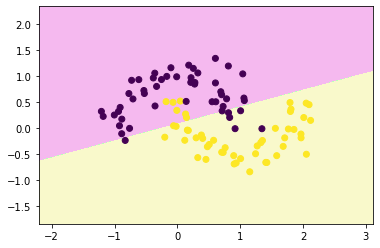

In [5]:
decision_boundary_plot(x,y,lsvc)

In [6]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

In [7]:
poly_svc = Pipeline([
    ("poly", PolynomialFeatures(degree=3)),
    ("std_scaler", StandardScaler()),
    ("linearSVC", LinearSVC())
])

In [8]:
poly_svc.fit(x,y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('std_scaler', StandardScaler()), ('linearSVC', LinearSVC())])

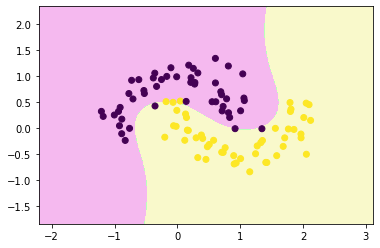

In [9]:
decision_boundary_plot(x,y,poly_svc)

## 核函数解决非线性问题

In [10]:
from sklearn.svm import SVC

In [11]:
poly_svc = Pipeline([
    ("std_scaler", StandardScaler()),
    ("polySVC", SVC(kernel='poly', degree=3, coef0=5 ))
])
poly_svc.fit(x,y)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('polySVC', SVC(coef0=5, kernel='poly'))])

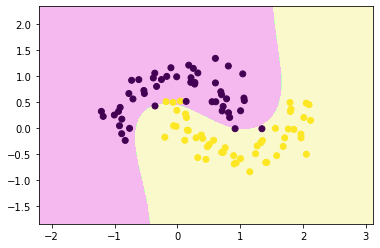

In [12]:
decision_boundary_plot(x,y,poly_svc)

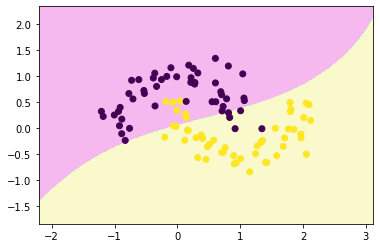

In [13]:
rbf_svc = Pipeline([
    ("std_scaler", StandardScaler()),
    ("rbfSVC", SVC(kernel='rbf', gamma=0.1 ))
])
rbf_svc.fit(x,y)
decision_boundary_plot(x,y,rbf_svc)

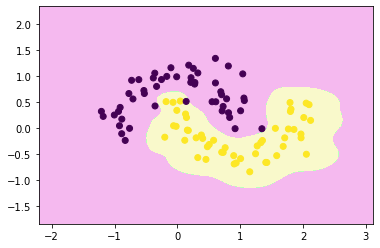

In [14]:
rbf_svc = Pipeline([
    ("std_scaler", StandardScaler()),
    ("rbfSVC", SVC(kernel='rbf', gamma=10 ))
])
rbf_svc.fit(x,y)
decision_boundary_plot(x,y,rbf_svc)

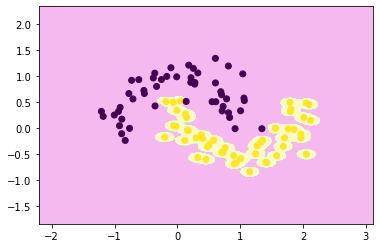

In [15]:
rbf_svc = Pipeline([
    ("std_scaler", StandardScaler()),
    ("rbfSVC", SVC(kernel='rbf', gamma=100 ))
])
rbf_svc.fit(x,y)
decision_boundary_plot(x,y,rbf_svc)